In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import librosa.display
import soundfile as sf
import sounddevice as sd

### 1. Constant-Q spectrogram and chromagram (1 point)

#### a) Load 'brahms_hungarian_dance_5_short.wav'

In [2]:
# load brahms_hungarian_dance_5_short.wav
x, fs = librosa.load('brahms_hungarian_dance_5_short.wav', sr=None, mono=True, offset=0.0, duration=None)

#### b) Calculate the spectrogram

In [3]:
# calculate the spectrogram of x
spectrogram = librosa.core.stft(x, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect')

#### c) Calculate the constant-Q spectrogram

In [4]:
constant_Q_spectrogram = librosa.core.cqt(x, sr=fs, hop_length=512, fmin=None, n_bins=84, bins_per_octave=12, tuning=0.0, filter_scale=1, norm=1, sparsity=0.01, window='hann', scale=True, pad_mode='reflect')

#### d) Calculate the chromagram

In [5]:
chromagram = librosa.feature.chroma_stft(y=x, sr=fs, S=None, norm=np.inf, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', tuning=None, n_chroma=12)

#### e) Plot, observe and report differences.

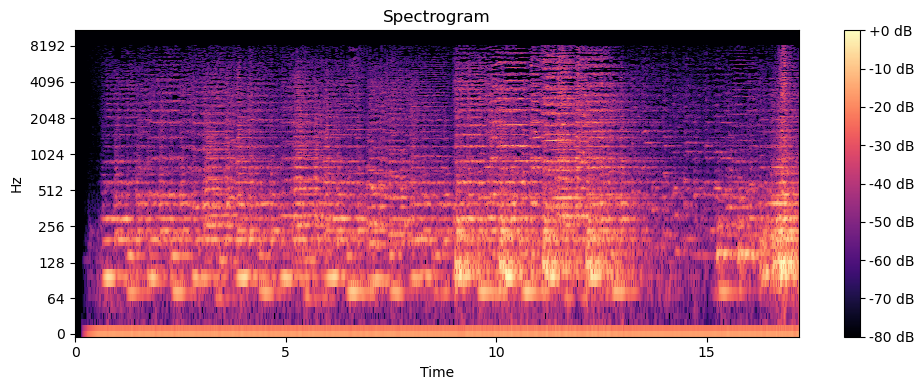

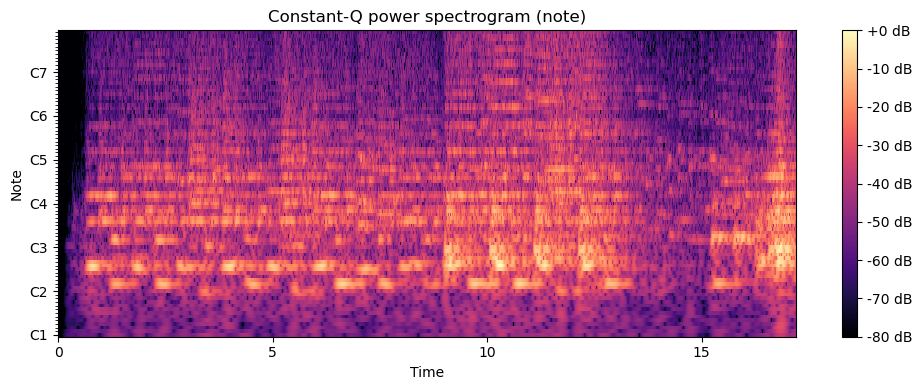

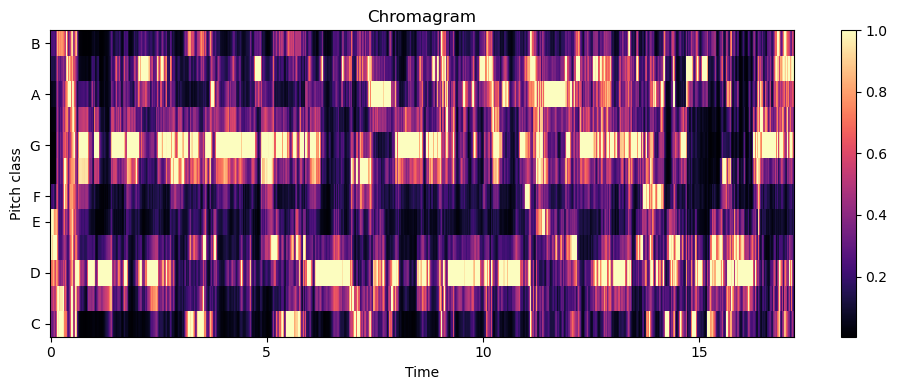

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), y_axis='log', x_axis='time', sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(constant_Q_spectrogram), ref=np.max), y_axis='cqt_note', x_axis='time', sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', sr=fs)
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

#### Make function for analysing the Constant-Q spectrogram and chromagram

In [7]:
def audio_analyze(audio,fs,name):
    # calculate the spectrogram of x
    spectrogram = librosa.core.stft(audio, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect')

    constant_Q_spectrogram = librosa.core.cqt(audio, sr=fs, hop_length=512, fmin=None, n_bins=84, bins_per_octave=12, tuning=0.0, filter_scale=1, norm=1, sparsity=0.01, window='hann', scale=True, pad_mode='reflect')

    chromagram = librosa.feature.chroma_stft(y=audio, sr=fs, S=None, norm=np.inf, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', tuning=None, n_chroma=12)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), y_axis='log', x_axis='time', sr=fs)
    plt.colorbar(format='%+2.0f dB')
    plt.title(name + ' Spectrogram')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(constant_Q_spectrogram), ref=np.max), y_axis='cqt_note', x_axis='time', sr=fs)
    plt.colorbar(format='%+2.0f dB')
    plt.title(name + ' Constant-Q power spectrogram (note)')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', sr=fs)
    plt.colorbar()
    plt.title(name + ' Chromagram')
    plt.tight_layout()
    plt.show()

#### Run other audio files and make observation

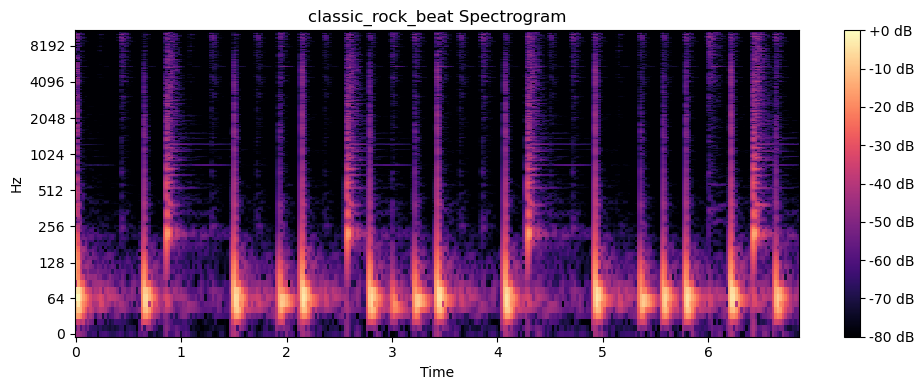

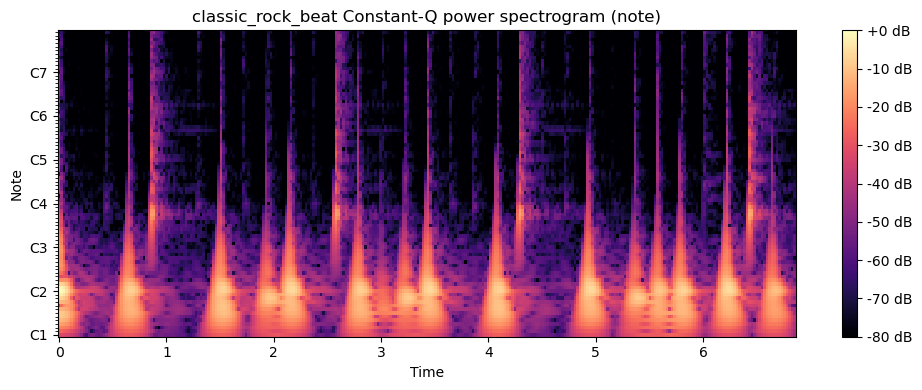

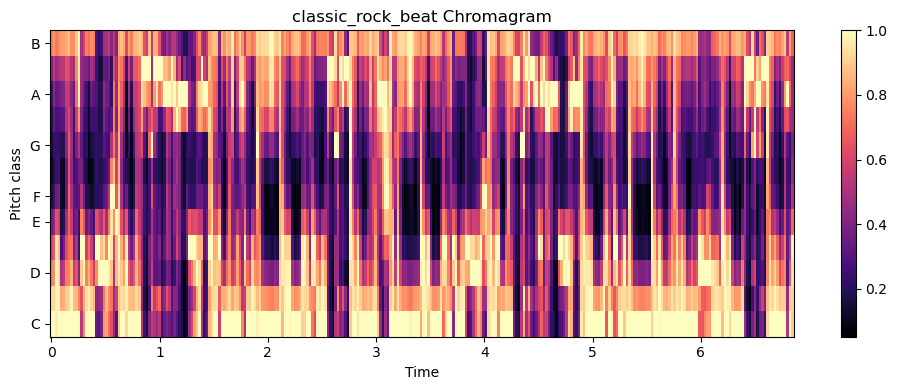

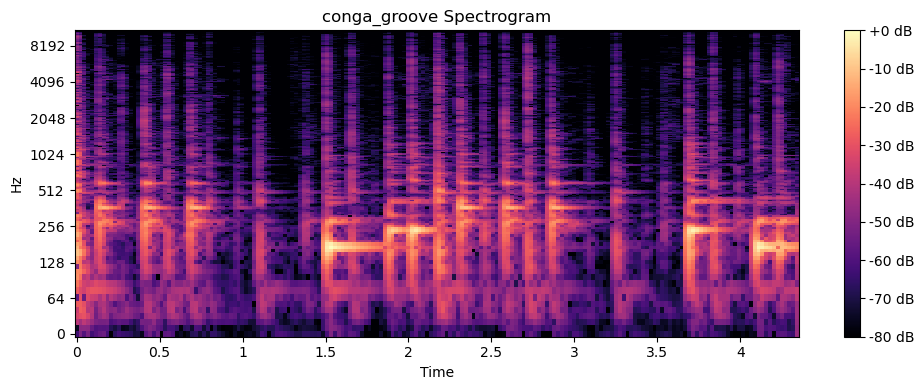

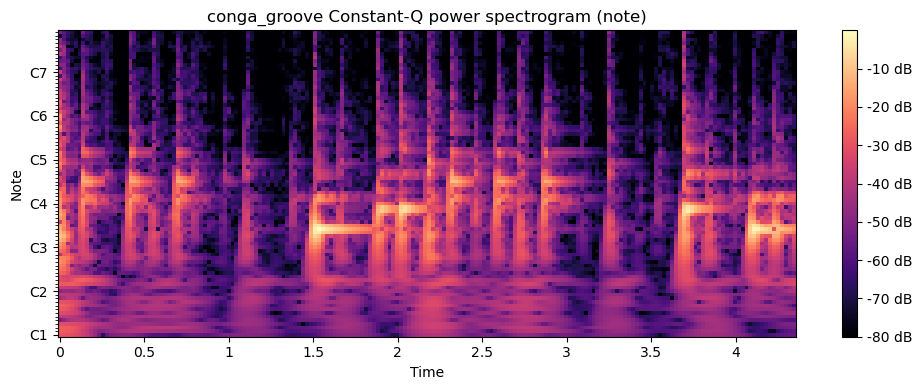

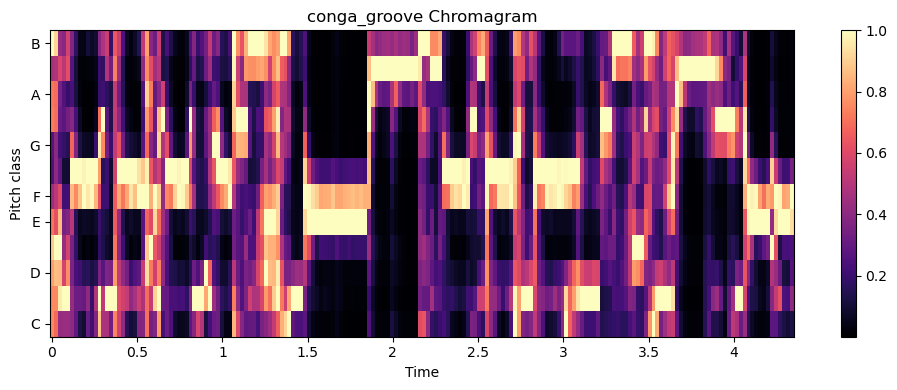

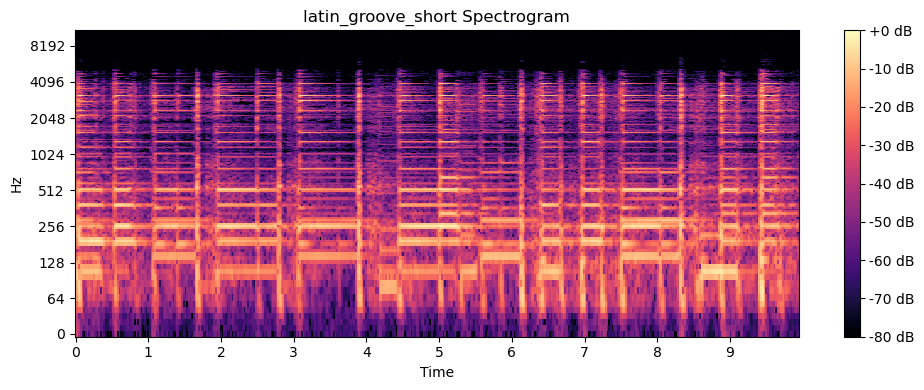

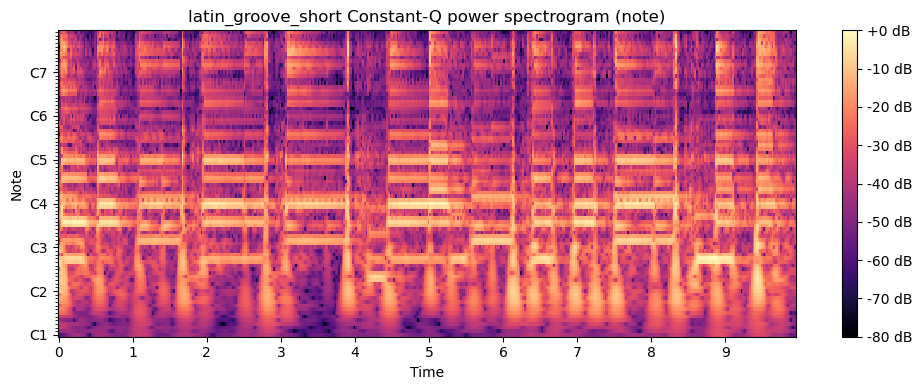

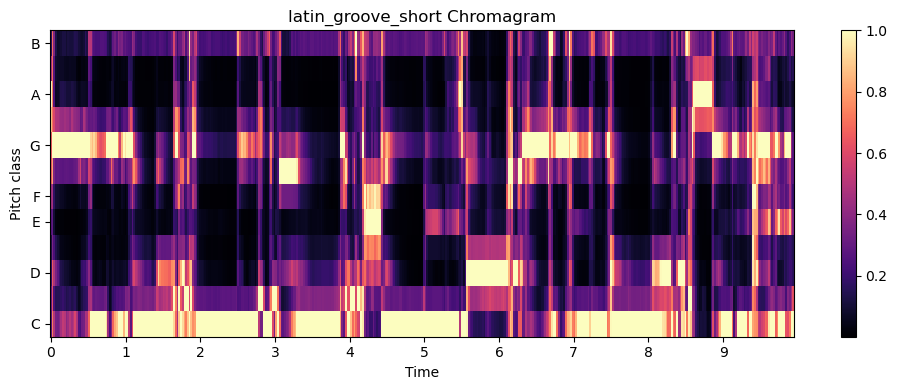

In [8]:
audio, fs = librosa.load('classic_rock_beat.wav', sr=None, mono=True, offset=0.0, duration=None)
audio_analyze(audio,fs,'classic_rock_beat')

audio, fs = librosa.load('conga_groove.wav', sr=None, mono=True, offset=0.0, duration=None)
audio_analyze(audio,fs,'conga_groove')

audio, fs = librosa.load('latin_groove_short.wav', sr=None, mono=True, offset=0.0, duration=None)
audio_analyze(audio,fs,'latin_groove_short')

#### Report and Observation

In [9]:
# based on the spectrogram, constant-Q power spectrogram and chromagram of 4 audio files, I think the classic_rock_beat is the most similar to the brahms_hungarian_dance_5_short.wav
# because the classic_rock_beat has the similar spectrogram and chromagram with brahms_hungarian_dance_5_short.wav
# and the constant-Q power spectrogram of classic_rock_beat has the similar pattern with brahms_hungarian_dance_5_short.wav
# the conga_groove has the similar spectrogram and chromagram with brahms_hungarian_dance_5_short.wav
# but the constant-Q power spectrogram of conga_groove is different from brahms_hungarian_dance_5_short.wav
# the latin_groove_short has the similar spectrogram and chromagram with brahms_hungarian_dance_5_short.wav
# but the constant-Q power spectrogram of latin_groove_short is different from brahms_hungarian_dance_5_short.wav
# so I think the classic_rock_beat is the most similar to the brahms_hungarian_dance_5_short.wav

### 2. Onset detection (1 point)

#### a.1) load the audio file

In [10]:
audio, sr = librosa.load('brahms_hungarian_dance_5_short.wav', sr=None, mono=True, offset=0.0, duration=None)

#### a.2) Compute spectral novelty function

In [11]:
spectral_novelty = librosa.onset.onset_strength(y=audio, sr=sr, S=None, lag=1, max_size=1, detrend=False, center=True, feature=None, aggregate=None)


#### a.3) Pick peaks

In [12]:
peaks = librosa.util.peak_pick(spectral_novelty,pre_max= 1, post_max= 1,pre_avg= 1, post_avg= 1,delta= 0.5,wait= 1)

#### a.4) Convert frame indexes into time indexes

In [13]:
time_indexes = librosa.frames_to_time(np.arange(len(spectral_novelty)), sr=sr, hop_length=512, n_fft=None)

#### a.5) Plot onsets on top of the time domain signal. Report observations.

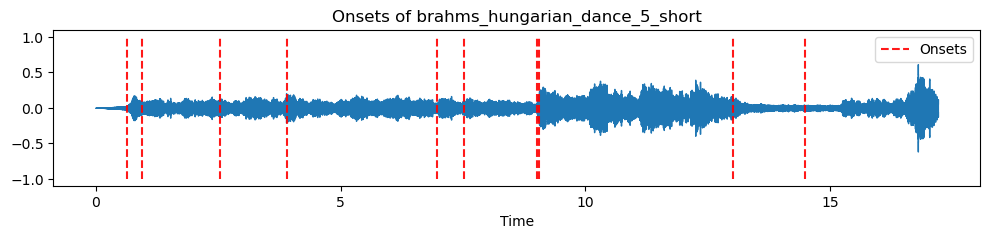

In [14]:
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr)
plt.vlines(time_indexes[peaks], -1, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.legend(frameon=True, framealpha=0.75)
plt.tight_layout()
plt.title('Onsets of brahms_hungarian_dance_5_short')
plt.show()


#### a.6) Plot onsets on top of the spectrogram. Report observations.

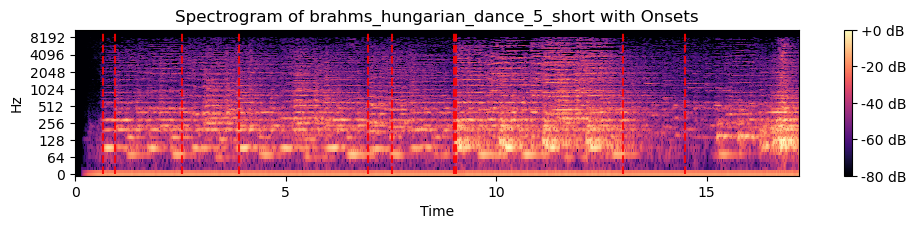

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), y_axis='log', x_axis='time', sr=fs)
plt.vlines(time_indexes[peaks], 0, 10000, color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of brahms_hungarian_dance_5_short with Onsets')
plt.tight_layout()
plt.show()

### Add clicks to the onsets

#### b.1) Create a signal consisting of clicks at specified locations.

In [16]:
clicks = librosa.clicks(times=time_indexes[peaks], sr=sr, length=len(audio))

#### b.2) Add the two signals together.

In [17]:
combined = audio + clicks


#### b.2) Play it.

In [18]:
sd.play(combined, sr)
sd.wait()

#### b.3) Stack them to create stereo signal.

In [19]:
stereo_signal = np.vstack((audio, clicks)).T


#### b.3) Play it.

In [20]:
sd.play(stereo_signal, sr)
sd.wait()

#### Make function for testing other samples

In [21]:
def onset_detection(audio, fs, name):
    spectral_novelty = librosa.onset.onset_strength(y=audio, sr=fs, S=None, lag=1, max_size=1, detrend=False, center=True, feature=None, aggregate=None)

    peaks = librosa.util.peak_pick(spectral_novelty,pre_max= 1, post_max= 1,pre_avg= 1, post_avg= 1,delta= 3,wait= 1)

    time_indexes = librosa.frames_to_time(np.arange(len(spectral_novelty)), sr=fs, hop_length=512, n_fft=None)

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio,sr=fs, x_axis='time')
    plt.vlines(time_indexes[peaks], -1, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.legend(frameon=True, framealpha=0.75)
    plt.tight_layout()
    plt.title('Onsets of ' + name )
    plt.show()

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), y_axis='log', x_axis='time', sr=fs)
    plt.vlines(time_indexes[peaks], 0, 10000, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of ' + name + ' with Onsets')
    plt.tight_layout()
    plt.show()

    clicks = librosa.clicks(times=time_indexes[peaks], sr=fs, length=len(audio))

    combined = audio + clicks

    sd.play(combined, fs)
    sd.wait()

    stereo_signal = np.vstack((audio, clicks)).T

    sd.play(stereo_signal, fs)
    sd.wait()

#### Testing on other samples

c:\Users\nguye\.conda\envs\vnqung\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  if __name__ == "__main__":


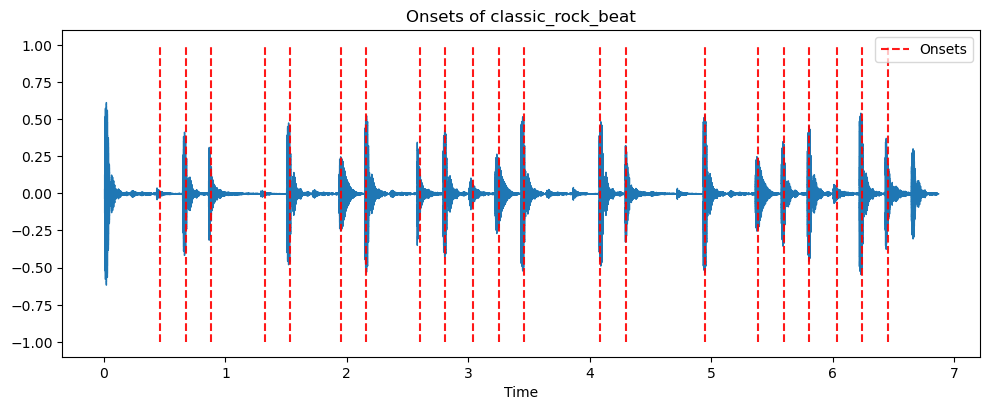

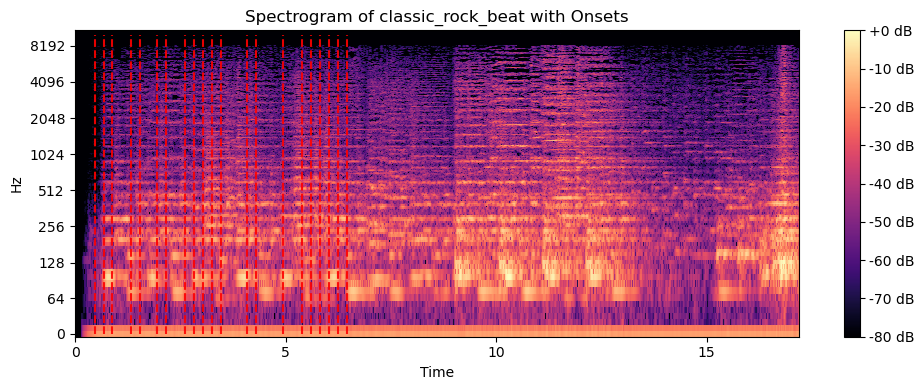

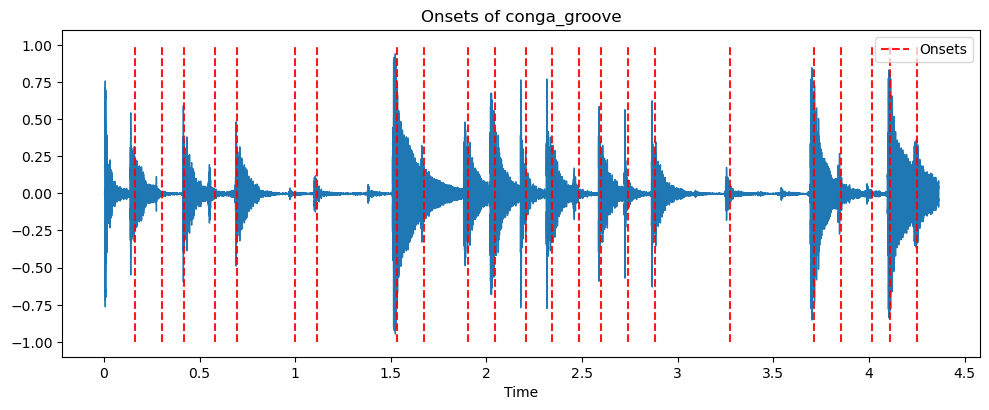

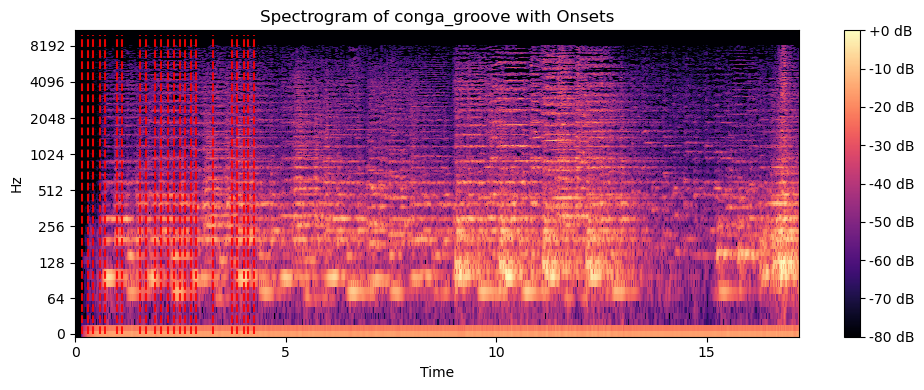

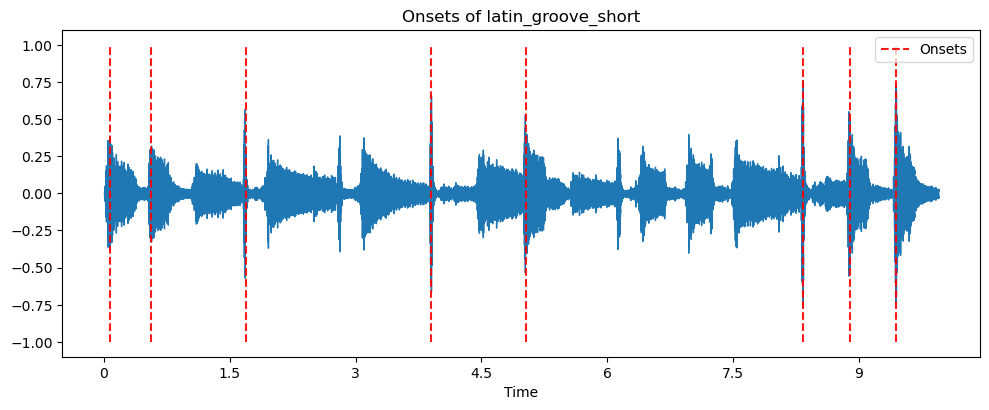

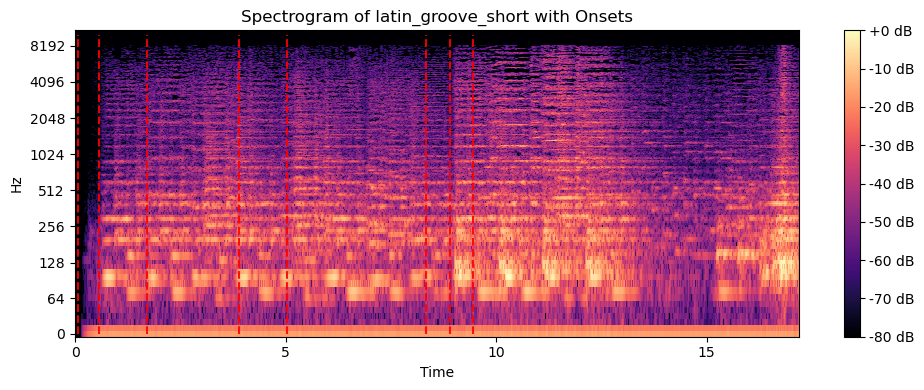

In [22]:
audio, fs = librosa.load('classic_rock_beat.wav', sr=None, mono=True, offset=0.0, duration=None)
onset_detection(audio,fs,'classic_rock_beat')

audio, fs = librosa.load('conga_groove.wav', sr=None, mono=True, offset=0.0, duration=None)
onset_detection(audio,fs ,'conga_groove')

audio, fs = librosa.load('latin_groove_short.wav', sr=None, mono=True, offset=0.0, duration=None)
onset_detection(audio,fs ,'latin_groove_short')

#### Report

In [ ]:
# after run the sound and plot the onsets and spectrograms of 4 audio files, I think the conga_groove is the most similar to the brahms_hungarian_dance_5_short.wav
# then add clicks to the conga_groove, the conga_groove with clicks is the most similar to the brahms_hungarian_dance_5_short.wav
# because the conga_groove has the similar spectrogram with brahms_hungarian_dance_5_short.wav
# and the onsets of conga_groove is similar with brahms_hungarian_dance_5_short.wav
# the classic_rock_beat has the similar spectrogram with brahms_hungarian_dance_5_short.wav
# but the onsets of classic_rock_beat is different from brahms_hungarian_dance_5_short.wav
# the latin_groove_short has the similar spectrogram with brahms_hungarian_dance_5_short.wav
# but the onsets of latin_groove_short is different from brahms_hungarian_dance_5_short.wav
# and the clicks of latin_groove_short is different from brahms_hungarian_dance_5_short.wav which is wider than the clicks of other audio files 

### Bonus problem: Implement your own spectral novelty function